In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [106]:
pwd

'C:\\Users\\ABIARYAA\\Machine Learning A-Z New\\Part 9 - Dimensionality Reduction\\Section 43 - Principal Component Analysis (PCA)'

In [107]:
os.chdir('C:\\Users\\ABIARYAA\\Machine Learning A-Z New\\Part 9 - Dimensionality Reduction\\Section 43 - Principal Component Analysis (PCA)')

In [108]:
dataset = pd.read_csv("Wine.csv")

In [109]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [110]:
dataset.shape

(178, 14)

In [111]:
#X many features
# y is 1,2 or 3
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [112]:
X,y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
 

In [113]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [120]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
# #Import PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components = None )
# #n_components is the no.of extracted features which explains the most of the variants
# #Here we have put None because we dont know how many are the componets that explains most of the variation
# X_train = pca.fit_transform(X_train)
# X_test  = pca.fit(X_test)
# explained_variance = pca.explained_variance_ratio_ #tells for each Principal component how much is the variation explained

In [14]:
# explained_variance

array([0.34742496, 0.19120613, 0.14128355, 0.12247686, 0.06541635,
       0.0359935 , 0.02875223, 0.01883058, 0.01574121, 0.01155457,
       0.00891286, 0.0080971 , 0.0043101 ])

In [121]:
#Import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2 )
#n_components is the no.of extracted features which explains the most of the variants
#Here we have put 2 because we want to visualize the components(most important top 2) 
#that explains most of the variation in 2D
X_train = pca.fit_transform(X_train)
X_test  = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_ #tells for each Principal component how much is the variation explained

In [122]:
X_train

array([[-9.95027381e-01, -6.76569483e-01],
       [-8.25758990e-01,  9.95889837e-01],
       [ 5.01565410e-01,  1.40164803e+00],
       [-1.16719551e+00, -1.04881992e+00],
       [ 8.48039433e-01,  1.52437389e-01],
       [ 1.17954326e+00, -8.68713059e-01],
       [ 3.98622020e-01,  1.42369691e+00],
       [-1.91066158e-01,  1.48551896e+00],
       [-1.39275944e-01,  1.43657551e+00],
       [ 9.77664638e-01, -6.94455126e-01],
       [-1.36151921e+00, -1.55962275e-01],
       [ 8.95945619e-01,  7.91347336e-01],
       [-9.87233211e-01, -6.15853968e-01],
       [ 1.01371263e+00, -1.51133703e+00],
       [-1.05117584e+00, -1.29858750e-01],
       [-1.37438543e+00, -1.76143560e-01],
       [ 1.20308446e+00, -5.47922549e-01],
       [-4.98781924e-01, -2.23321997e+00],
       [ 1.19913403e+00, -1.87319944e-03],
       [ 9.04572692e-02,  1.44625542e+00],
       [-1.22134823e+00, -1.63307941e+00],
       [-1.16344596e+00, -2.85665003e-01],
       [ 8.10220559e-01,  5.32319846e-01],
       [-1.

In [123]:
X_test

array([[-0.54754388, -0.91373349],
       [-1.81287186,  1.10764698],
       [ 1.43457119, -0.67502221],
       [-0.60679368, -1.12422474],
       [ 0.56168872,  0.39052896],
       [-0.21127445, -0.53402726],
       [-0.97079206, -0.86367026],
       [-0.77912983,  1.55737848],
       [ 1.26219489,  0.43280053],
       [ 1.17343959,  0.90657179],
       [-0.64224894,  1.20882748],
       [-0.83701495,  2.12849157],
       [-0.9365656 , -1.34968374],
       [ 1.20758153, -0.77980527],
       [-1.68095236,  0.97025889],
       [ 2.05006398,  0.01093348],
       [-1.02267369, -0.79193854],
       [-1.16027413, -1.56859304],
       [ 0.14717946,  1.08420741],
       [-0.12812868, -1.21070906],
       [ 1.57908061, -0.80472904],
       [-0.03555308, -0.31359859],
       [-0.52657237, -0.38853541],
       [ 1.27497331,  0.10123914],
       [ 0.48535916,  1.04225817],
       [ 1.12023352,  0.42456888],
       [ 0.84792322,  0.18787242],
       [ 1.17753781,  0.67506919],
       [ 0.13156871,

In [124]:
#Fiiting a logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train , y_train)

C:\Users\ABIARYAA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ABIARYAA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
#Predicting the test set results
y_pred = classifier.predict(X_test)

In [126]:
#Making a Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm    #3 real classes and 3 predicted classes

array([[ 1,  0, 13],
       [ 8,  7,  1],
       [ 0,  6,  0]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


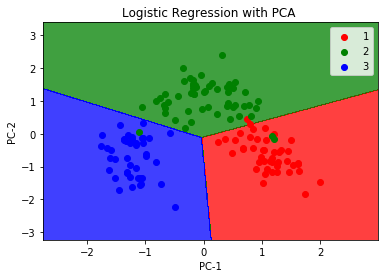

In [129]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue'))) #Additional blue
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression with PCA ')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


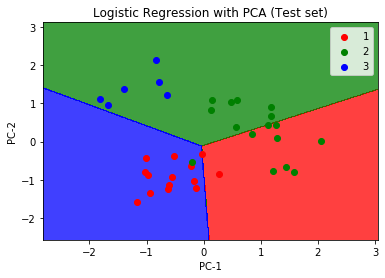

In [131]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression with PCA (Test set)')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend()
plt.show()
